译自 Johansson, R. (2019). Ordinary Differential Equations. In: Numerical Python . Apress, Berkeley, CA. https://doi.org/10.1007/978-1-4842-4246-9_9

方程中未知量是函数而不是变量，且未知量涉及未知函数的导数的方程称为微分方程。常微分方程（ordinary differential equation,  ODE）是一类特殊情况，未知函数只有一个独立变量，方程中存在未知函数的导数。另一方面，如果方程中存在多个变量的导数，则被称为偏微分方程。这里我们关注的是常微分方程(在下面缩写为 ODE)，探索求解这类方程的符号方法和数值方法。ODE 的解析闭合解通常不存在，但对于许多特殊类型的 ODE，存在解析解，在这些情况下，我们有机会使用符号方法找到解。如果不行，我们必须像往常一样采用数值技术求解。

常微分方程在科学和工程以及许多其他领域中普遍存在（例如，它们出现在动力学系统的研究中）。ODE 的一个典型例子是描述时间演化过程，其中变化的速率（导数）与过程的其它属性有关。为了了解在给定一些初始状态后，过程在时间上是如何演变的，我们必须求解，或积分描述该过程的 ODE。常微分方程应用的具体例子有：物理学中机械运动的规律、化学和生物学中的分子反应以及生态学中的种群模型。

在本章中，我们将探讨解 ODE 的符号方法和数值方法。对于符号方法，我们使用 `SymPy` 模块，对于数值积分，我们使用 `SciPy` 中积分模块的函数。


# 常微分方程

常微分方程最简单的形式是 $\frac{dy(x)}{dx}=f(x, y(x))$，其中 $y(x)$ 是未知函数，$f(x, y(x))$ 是已知的。由于 $y(x)$ 的导数出现在方程中，所以这是一个微分方程。又由于方程中只出现了一阶导数，因此它是一阶 ODE。更一般地说，我们可以将第 $n$ 阶 ODE 显式地写成 $\frac{d^ny}{dx^n} = f(x, y, \frac{dy}{dx}, ... , \frac{d^{n-1}y}{dx^{n-1}})$，或者以隐式地写成 $F(x, y, \frac{dy}{dx}, ... , \frac{d^ny}{dx^n})$，其中 $f$ 和 $F$ 是已知函数。

一阶 ODE 的一个例子是牛顿冷却定律（*Newton's law of cooling*）$\frac{dT(t)}{dt} = -k(T(t) - T_a)$，它描述了环境温度为 $T_a$，则物体温度为 $T(t)$。该 ODE 的解是 $T(t) = T_a + (T_0 - T_a)e^{-kt}$，其中 $T_0$ 是物体的初始温度。二阶 ODE 的一个例子是牛顿第二运动定律（*Newton's second law of motion*）$F = ma$，或者更明确的是 $F(x(t)) = m \frac{d^2x(t)}{dt^2}$。这个方程描述了当受到位置相关（*position-dependent*）的力 $F(x(t))$ 时，质量为 $m$ 的物体的位置为 $x(t)$。为了完全的给出这个 ODE 的解，我们除了找到它的一般解之外，还必须给出对象的初始位置和速度。同理，$n$ 阶 ODE 的一般解有 $n$ 个自由参数，我们需要给出未知函数的初始条件和其 $n-1$ 个导数。

ODE 总是可以重写为一阶常微分方程组。具体而言 $n$ 阶 ODE $\frac{d^ny}{dx^n} = g(x, y, \frac{dy}{dx},...,\frac{d^{n-1}y}{dx^{n-1}})$，可以通过引入 $n$ 个新函数以标准形式显式地写为 $y_1 = y, y_2 = \frac{dy}{dx}, ..., y_n = \frac{d^{n-1}y}{dx^{n-1}}$。这给出了以下一阶常微分方程组：

$$
\frac{d}{d x}\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n-1} \\
y_{n}
\end{array}\right]=\left[\begin{array}{c}
y_{2} \\
y_{3} \\
\vdots \\
y_{n} \\
g\left(x, y_{1}, \ldots, y_{n}\right)
\end{array}\right]
$$
它也可以写成更紧凑的向量形式：$\frac{d}{dx} y(x) = f(x, y(x))$这个规范形式对于 ODE 的数值解尤其有用，且常见的求解 ODE 的数值方法需要函数 $f = (f_1, f_2, ..., f_n)$ （本例是 $f=(y_2, y_3, ..., g)$）作为输入变量。如，牛顿第二运动定律的二阶 ODE $F(x) = m \frac{d^2x}{dt^2}$可以写成标准形式 $y = [y_1=x, y_2 = \frac{dx}{dt}]^T$，给定 $\frac{d}{dt} \begin{bmatrix} y_1 \\ y_2\end{bmatrix} = \begin{bmatrix} y_2 \\ F(y_1)/m \end{bmatrix}$。

如果函数 $f_1, f_2, ..., f_n$ 都是线性的，则相应的 ODE 组可以写成简单形式 $\frac{dy}{dt} = A(x)y(x) + r(x)$，其中 $A(x)$ 是一个 $n \times n$ 矩阵，而 $r(x)$ 是一个仅依赖于 $x$ 的 $n$ 维向量。在这种形式中，$r(x)$ 被称为源项，如果 $r(x) = 0$，则线性系统齐次，否则非齐次。线性常微分方程是可解（如，使用 $A(x)$ 的特征值分解）的重要特例。同样，对于具有某些属性或形式的函数 $f(x, y(x))$，除了近似数值方法外，可能有已知解或特殊方法来解相应的问题，但是对于一般的 $f(x, y(x))$ 没有通用方法。

除了函数 $f(x, y(x))$ 的性质影响 ODE 问题的可解性，ODE 的边界条件也会影响。需要边界条件来确定出现在解中的积分常数的值。ODE 问题的边界条件主要有两种类型：初值条件（*initial value conditions*）和边值条件（*boundary value conditions*）。对于初值问题，函数及其导数的值在起点给出，问题是自变量从起点向前演化函数。对于边值问题，未知函数及其导数的值在不动点给出，这些不动点通常是感兴趣域的终点。

# 符号求解 ODE

`SymPy` 提供了一个通用的 ODE 求解工具 `sympy.dsolve`，它能够找到许多基本 ODE 的解析解。 `sympy.dsolve` 函数会尝试自动对给定的 ODE 进行分类，尝试使用各种技术来求解给定 ODE。我们可以给 `dsolve` 函数一些提示，这可以引导它到最合适的求解方法。虽然 `dsolve` 可以用来符号化地求解许多简单的 ODE，但我们将在后面看到（值得记住的是）大多数 ODE 不能解析地求解。 ODE 符号解的典型例子是一阶或二阶 ODE 的求解，以及具有较少未知函数的一阶线性常微分方程的求解。如果 ODE 具有特殊的对称性，或其他特性，如可分离、具有常数系数或存在已知解析解的特殊形式，则它也有很大帮助。虽然这些 ODE 类型是例外情况和特殊情况，但这些 ODE 有许多重要的应用，对于这些情况，`SymPy` 的 `dsolve` 可能是对传统分析方法的非常有用的补充。在本节中，我们将探讨如何使用 `SymPy` 及其 `dsolve` 函数来解简单但常见的 ODE。

为了说明用 `SymPy` 求解 ODE 的方法，我们从最简单的问题开始，然后，逐步研究更复杂的情况。第一个例子是简单的一阶 ODE： 牛顿冷却定律，$\frac{dT(t)}{dt} = -k(T(t) - T_a)$，初值为 $T(0) = T_0$。

为了用 `SymPy` 解决这个问题，我们首先需要为变量 $t, k, T_0, T_a$ 定义符号，并且为了表示未知函数 $T(t)$，我们可以使用 `sympy.Function` 对象：


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

sympy.init_printing()  # 初始化其屏幕打印系统


In [2]:
t, k, T0, Ta = sympy.symbols('t, k, T_0, T_a')
T = sympy.Function('T')

接下来，我们可以非常自然地定义 ODE，只需在 ODE 的左侧创建一个 `SymPy` 表达式（当将公式写成 $\frac{dT(t)}{dt} + k(T(t) - T_a) = 0$ 的形式时）。这里，为了表示函数 $T(t)$，我们可以使用 `Sympy` 函数对象 $T$。使用函数调用语法 $T(t)$，将符号 $t$ 应用于它，会产生一个应用的函数对象，我们可以使用 `sympy.diff` 或 `diff` 方法对 $T(t)$ 表达式进行求导：

In [3]:
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode, 0)

这里，我们使用 `sympy.Eq` 来显示包含等号且右边为零的方程。鉴于 ODE 的这种表示，我们可以直接将它传递给 `sympy.dsolve`，它将尝试自动查找 ODE 的一般解。

In [4]:
ode_sol = sympy.dsolve(ode)
ode_sol

对于该 ODE，`sympy.dsolve` 函数的确找到了一般解，它包含一个未知的积分常数 $C_1$，我们必须从问题的初始条件中确定它。`sympy.dsolve` 的返回值是 `sympy.Eq` 的一个实例，它是等式的符号表示。它具有用于访问等式对象的左侧和右侧的属性`lhs` 和 `rhs`：

In [5]:
ode_sol.lhs

In [6]:
ode_sol.rhs

一旦找到一般解，我们需要使用初始条件来找到尚未确定的积分常量的值。这里的初始条件是 $T(0) = T_0$。为此，我们首先创建一个描述初始条件的字典，$ics = \{T(0): T_0\}$，我们可以使用 `SymPy` 的 `subs` 方法以及初始条件字典来将初始条件应用到 ODE 的解。这将产生未知积分常数 $C_1$ 的方程：

In [7]:
ics = {T(0): T0}
C_eq = sympy.Eq(ode_sol.lhs.subs(t, 0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

在本例中，$C_1$ 的等式很容易求解，但为了通用性，我们使用 `sympy.solve` 解决它。结果是一个解的列表（在本例中是一个仅有一个解的列表）。我们可以将 $C_1$ 的解代入 ODE 的一般解，以获得与给定初始条件相对应的特解：

In [8]:
C_sol = sympy.solve(C_eq)
C_sol

In [9]:
ode_sol.subs(C_sol[0])

通过执行这些步骤，我们完全符号化地解了 ODE 问题，并且获得解 $T(t) = T_a + (T_0 - T_a)e^{-kt}$。此过程涉及的步骤很简单，但应用初始条件和求解未确定的积分常量可能会稍微繁琐，值得在可重用的函数中执行这些步骤。以下函数 `apply_ics` 是将这些步骤推广到任意阶微分方程的基本实现。

In [10]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
    to the solution of the ODE with independent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """

    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)

    return sol.subs(sol_params)

利用这个函数，我们可以更方便地挑出一个满足一组初始条件 ODE 的特解，给定相同 ODE 的一般解。对于前面的示例，我们有：

In [11]:
ode_sol

In [12]:
apply_ics(ode_sol, ics, t, [k, Ta])

到目前为止，我们所看的例子几乎是微不足道的，但同样的方法可以用来处理任何 ODE 问题，尽管当然不能保证会找到一个解。作为稍微复杂一些的问题的例子，考虑阻尼谐振子的 ODE，它是形式为 $\frac{d^2x(t)}{dx^2} + 2\gamma \omega_0 \frac{dx(t)}{dt} + \omega_0^2x(t) = 0$ 的二阶 ODE，其中 $x(t)$ 是振荡器在 $t$ 时刻的位置，$\omega_0$ 是无阻尼情况的频率，$\gamma$ 是阻尼比。我们首先定义所需的符号并构造 ODE，然后通过调用 `sympy.dsolve` 来找到一般解：

In [13]:
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)
x = sympy.Function('x')
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0 ** 2 * x(t)

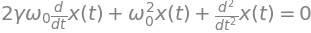

In [14]:
sympy.Eq(ode,0)

In [15]:
ode_sol = sympy.dsolve(ode)
ode_sol

由于这是一个二阶 ODE，因此在通用解中有两个待定积分常数。我们需要为位置 $x(0)$ 和速度 $\frac{dx(t)}{dt}\Bigr|_{t=0}$ 指定初始条件，以便为 ODE 指定一个特解。为此，创建一个包含这些初始条件的字典，并使用 `apply_ics` 将其应用于 ODE 解：

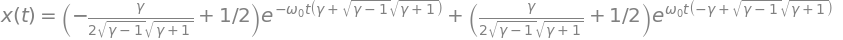

In [16]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

这是具有初始条件 $x(0) = 1, \quad \frac{dx(t)}{dt}\Bigr|_{t=0} = 0$ 振荡器对任意 $t, \quad \omega_0, \quad \gamma$ 的动力学解。然而，将对应于临界阻尼的 $\gamma = 1$ 直接代入该表达式会导致 `division by zero` 错误，对于 $\gamma$ 的这种特殊选择，我们需要小心并计算 $\gamma \to 1$ 时的极限。

In [17]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

最后，我们绘制 $\omega_0 = 2\pi$ 和阻尼比 $\gamma$ 不同值的图形：

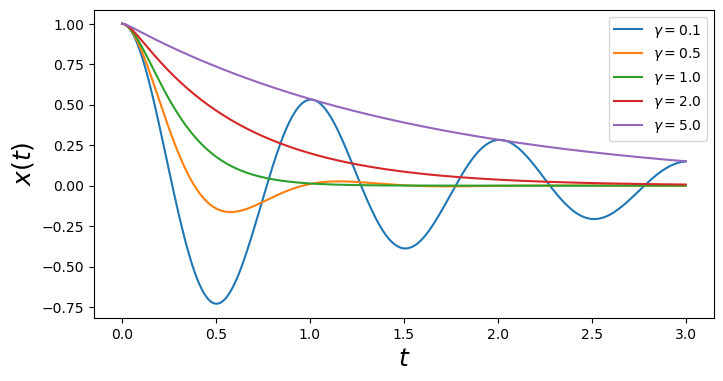

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()

迄今为止，我们研究的两个 ODE 例子都可以通过分析手段完全解决，但事实上这远远不够。即使是很多一阶 ODE 也不能精确求解。例如，考虑 $\frac{dy(x)}{dx} = x + y(x)^2$，这是一个没有任何解析解（closed-form solution）的 ODE 的例子。如果试图用 sympy.dsolve 来求解这个方程式，我们可以得到一个幂级数的形式的近似解：

In [19]:
x = sympy.symbols('x')
y = sympy.Function('y')
f = y(x)**2 + x
sympy.init_printing()
sympy.Eq(y(x).diff(x), f)

后续代码报错，无法复现，
pass


# 数值方法求解 ODE
虽然一些 ODE 问题可以用分析方法来解决，更常见的是无法通过分析方法来解。因此，在实际应用中，ODE 主要采用数值方法求解。数值求解 ODE 的方法有很多，其中大多数都是针对标准形式 $\frac{dy(x)}{dx} = f(x, y(x))$ 的一阶常微分方程组而设计的，这里 y(x) 是未知函数的向量。SciPy 提供了解这类问题的函数，但在我们探索如何使用这些函数之前，我们简要回顾一下基本概念，并介绍关于数值积分的术语。

很多 ODE 数值方法的基本思想都来自欧拉方法。该方法可以从点 x 处的泰勒级数展开推导出：

$$y(x+h) = y(x) + \frac{dy(x)}{dx}h + \frac 12 \frac{d^2y(x)}{dx^2}h^2 + …$$

为了表示简单，我们考虑 y(x) 是标量函数的情况。通过去掉二阶或更高阶项，我们得到在步长 $h$ 中精确到一阶的近似等式 $y(x+h) \approx y(x) + f(x, y(x))h$。通过离散 x 变量，$x_0, x_1, ..., x_k$，选择步长 $h_k = x_{k+1} - x_k$ ，并令 $y_k = y(x_k)$，可以将该方程转化为迭代公式。得到的迭代公式 $y_{k+1} = y_k + f(x_k, y_k)h_k$ 被称为向前欧拉方法（forward Euler method），这里是显式的形式，给定 $y_k$ 的值，我们可以使用公式直接计算出 $y_{k+1}$。数值求解初始值问题的目标是，给定初始条件 $y(x_0) = y_0$，计算在某些点 $x_n$ 处的 $y(x)$。因此，可以使用类似于向前欧拉方法的迭代公式，来计算从 $y_0$ 开始的连续的 $y_k$ 值。该方法涉及两种误差：首先，泰勒级数截断的误差限制了该方法的准确性。其次，在计算 $y_{k+1}$ 时，使用上次迭代给出的 $y_k$ 的近似值会产生额外误差，误差在迭代的过程中不断累积，并且这会影响方法的稳定性。

可以用类似的方式推导出另一种形式，向后欧拉方法（backward Euler method），迭代公式为：$y_{k+1} \approx y_k + f(x_{K+1}, y_{k+1})h_k$。这是向后微分公式（backward differentiation formula，BDF）的一个例子，是隐式的，因为 $y_{K+1}$ 出现在方程的两边。为了计算 $y_{k+1}$，我们需要求解代数方程。隐式方法比显式方法实现起来更复杂，每次迭代都需要更多的计算工作。然而，隐式方法的优点是（通常）具有较大的稳定性区域和较高的准确性，这意味着在使用较大的步长 $h_k$ 的同时，仍然能获得准确和稳定的解。显式或隐式方法是否更有效取决于正在求解的特定问题。隐式方法通常对于刚性（stiff）问题特别有用，这些刚性问题一般来说描述的是，具有多个不同时间尺度的动力学（例如，包括快振荡和慢振荡的动力学）的 ODE 问题。

有多种方法可以改进一阶欧拉方法。一种策略是在 $y(x+h)$ 的泰勒级数展开中保留高阶项，从而得到更精确的高阶迭代公式，例如二阶方法 $y_{k+1} \approx y(x_k) + f(x_{k+1}, y_{K+1})h_k + \frac 12 y_k^{''}(x)h_k^2$。然而，这种方法需要计算 y(x) 的高阶导数，如果 $f(x, y(x))$ 事先不知道（且没有以符号形式给出）这可能是一个问题。解决这个问题的方法有：使用导数的有限差分近似来逼近高阶导数，或者通过在间隔 $[x_k, x_{k+1}]$ 的中点对函数 $f(x, y(x))$ 进行采样。众所周知的龙格－库塔法（Runge-Kutta methods）是这种类型方法的一个例子。着名的龙格-库塔法是四阶形式：

$$y_{k+1} =y_k + \frac 16 (k_1 + 2k_2 + 2k_3 + k_4)$$

其中，

$$k_1 = f(t_k, y_k)h_k, \
k_2 = f(t_k + \frac{h_k}{2}, y_k + \frac{k_1}{2})h_k, \
k_3 = f(t_k + \frac{h_k}{2}, y_k + \frac{k_2}{2})h_k, \
k_4 = f(t_k + h_k, y_k + k_3)h_k$$

这里，$k_1$ 到 $k_4$ 是上面给出的 $y_{k+1}$ 的显式公式中使用的 ODE $f(x, y(x))$ 的四种不同的计算方式。$y_{k+1}$ 的结果估值精确到 4 阶，具有 5 阶误差。也可以构建使用更多计算函数的高阶方案。通过组合两种不同阶次的方法，也可以估计近似值的误差。流行的组合形式是龙格库塔 4 阶与 5 阶的组合，可以得到具有误差估计的 4 阶精确。它被称为 RK45 或龙格-库塔-费伯格（Runge-Kutta-Fehlberg）方法。Dormand-Prince 方法是高阶方法的另一个例子，它还使用了自适应步长控制。

另一种方法是使用多个 $y_k$ 前值来计算 $y_{k+1}$。该方法被称为多步法，可以写成如下形式：

 


$$y_{k+1} = \sum_{n=0}^{s-1}a_ny_{k+n} + h \sum_{n=0}^s b_n f(x_{k+n}, y_{k+n})$$

这个公式意味着为了计算 $y_{k+s}$，需要使用前面 s 步的 $y_k$ 和 $f(x_k, y_k)$（称为 s-step 法）。系数 $a_n$ 和 $a_n$ 的选择产生不同的多步方法。注意，如果 $b_s = 0$，则该方法是显式的，如果 $b_s \neq 0$ 则是隐式的。

如，$b_0 = b_1 = ... = b_{s-1} = 0$ 给出了 s 步 BDF 的一般公式。其中 $a_n$ 和 $b_n$ 被选择以最大化阶数。这给出了一个可以解出未知系数 $a_n$ 和 $b_n$ 的方程组。
例如，$b_1 = a_0 = 1$ 的一步 BDF 方法退化为向后欧拉法 $y_{k+1} = y_k + hf(x_{k+1}, y_{k+1})$，两步 BDF 方法 $y_{k+2} = a_0 y_k + a_1y_{k+1} + hb_2f(x_{k+2}, y_{k+2})$，解出系数后，变为：$y_{k+2} = -\frac 13 y_k + \frac 43 y_{k+1} + \frac 23 hf(x_{k+2}, y_{k+2})$。高阶 BDF 方法也可以被构建。由于 SciPy 具有良好的稳定性，推荐使用 SciPy 提供的 BDF 求解器解决刚性问题。

另一类多步法是 Adams 方法，由选择 $a_0 = a_1 = ... = a_{s-2} = 0$ 和 $a_{s-1} = 1$ 产生，而剩余未知系数的选择以最大化该方法的阶次为目标。具体来说，其中 $b_s = 0$ 的显式方法称为 Adams-Bashforth 方法，而 $b_s \neq 0$ 的隐式方法称为 Adams-Moulton 方法。一步 Adams-Bashforth 和 Adams-Moulton 方法分别退化为向前和向后欧拉法，两步方法分别为 $y_{k+2} = y_{k+1} + h(-\frac 12 f(x_k, y_k) + \frac 32 f(x_{k+1}, y_{k+1}))$ 和 $y_{k+1} = y_k + \frac 12 h(f(x_k, y_k) + f(x_{k+1}, y_{k+1}))$。高阶显式和隐式方法也可以用这种方式构造。使用这些 Adams 方法的求解器也可在 SciPy 中找到。

一般而言，显式方法比隐式方法实现起来更简单且计算量更少，而隐式方法原则上需要在每次迭代中求解（潜在的非线性的）方程，并对未知的 $y_{k+1}$ 进行初始猜测。但是，如前所述，隐式方法通常更准确，且具有更好的稳定性。保留这两种方法的优点的折衷方案是以下列方式组合显式和隐式方法：首先使用显式方法计算 $y_{k+1}$，如何使用这个 $y_{k+1}$ 作为隐式方法给出的 $y_{k+1}$ 的初始猜想。这个方程不需要精确求解，且由于显式方法的初始猜测应该相当好，所以（使用牛顿方法的）固定的迭代次数可能就足够了。这些方法，使用显式方法的结果来预测 $y_{k+1}$，使用隐式方法来校正预测，被称为预测-校正（predictor-corrector）方法。

最后，许多先进的 ODE 求解器采用的一个重要技术是自适应步长或步长控制：ODE 的准确性和稳定性与 ODE 方法的迭代公式中使用的步长 $h_k$ 密切相关，也与解的计算成本相关。如果 $y_{k+1}$ 中的误差可以与 $y_{k+1}$ 本身的计算一起估计，则可以自动调整步长 $h_k$，以便求解器在可能时使用较大的（经济的）步长，且在需要时使用较小的步长。相关的技术（在某些方法中使用的）是自动调整方法的阶数，以便尽可能使用较低阶的方法，必要时才使用较高阶的方法。

有很多种 ODE 求解器的高质量实现，很少有必要重新实现这里讨论的任何方法。 事实上，这样做（重新实现）可能是一个错误，除非是出于教育目的，或者是主要的研究方向是数值计算方法。出于实用目的，建议使用已存在的许多高度优化和经过彻底测试的 ODE 套件之一，大多数套件都是免费且开源的，并已封装到 SciPy 等库中。但是，由于有大量的可供选择的求解器，能够就某一特定问题使用哪一种求解器作出明智的决定，了解其中的许多选项，熟悉基本思想和方法以及它们的术语是非常重要的。

## 使用 SciPy 求解 ODE 数值微分

现在我们准备探索 SciPy 中可用的 ODE 求解器，以及如何使用它们。SciPy 的 integrate 模块提供了两个 ODE 求解器接口：integrate.odeint 和 integrate.ode。odeint 函数是 ODEPACK 的 LSODA 求解器的一个接口，它可以自动在（用于非刚性问题的）Adams 预测-校正方法和（用于刚性问题的）BDF 方法之间切换。而 integration.ode 类为许多不同的求解器提供了面向对象的接口，包括，VODE 和 ZVODE 求解器（ZVODE 是用于复值函数的 VODE 的变体），LSODA 求解器以及 dopri5 和 dop853（它们分别是具有自适应步长的 4 阶和 8 阶 Dormand-Prince 方法）。虽然由 integrate.ode 提供的面向对象的接口更加灵活，但 odeint 函数在许多情况下更简单和方便使用。

odeint 函数有三个强制性参数：用于评估标准形式 ODE 右侧的函数、指定未知函数初始条件的数组（或标量）以及具有自变量的数组，其中未知函数要被计算。ODE 右侧的函数有两个强制参数和任意数量的可选参数。必需的参数是向量 y(x) 的数组（或标量）以及 x 的值。再次考虑标量 ODE $y^{'}(x) = f(x, y(x)) = x + y(x)^2$。为了能够再次绘制这个 ODE 的方向场，这次与使用 odeint 进行数值积分得到的特解一起，我们首先定义构造 $f(x, y(x))$ 符号表达式所需的 SymPy 符号：

In [20]:
x = sympy.symbols('x')
y = sympy.Function('y')
f = y(x)**2 + x

为了能够通过 SciPy 的 odeint 求解这个 ODE，我们首先需要为 $f(x, y(x))$ 定义一个 Python 函数，它将 Python 标量或 NumPy 数组作为输入。从 SymPy 表达式 f，我们可以使用 `sympy.lambdify` 和 `numpy` 参数生成这样一个函数：

In [21]:
f_np = sympy.lambdify((y(x), x), f)

接下来，我们需要定义初值 y0 以及具有离散值 x 的 NumPy 数组。这里，使用 NumPy 数组 xp 和 xm 分别从 x=0 正方向和负方向上开始这个 ODE。请注意，在负方向上解 ODE，我们只需创建一个负增量的 NumPy 数组。现在我们已经设置了 ODE 函数 f_np，初值 y0 和 x 坐标数组（如 xp），我们可以通过调用 integrate.odeint(f_np，y0，xp)来求解 ODE 问题：

In [22]:
y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

结果是两个一维 NumPy 数组 ym 和 yp，其长度与对应坐标数组 xm 和 xp 的长度相同，数组中包含指定点处 ODE 问题的解。为了使解可视化，我们接下来将 ym 和 yp 数组与 ODE 的方向场一起绘制。

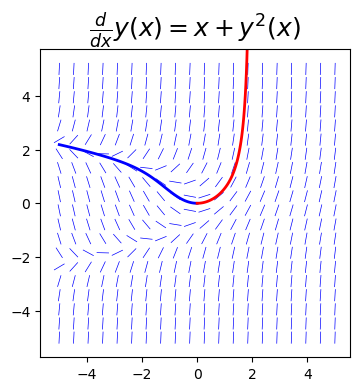

In [23]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)

    ax.axis('tight')
    ax.set_title(r"$%s$" %
        (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))), fontsize=18)

    return ax

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
plt.show()   

在前面的例子中，我们解了一个标量 ODE 问题。更多的时候，我们对向量值 ODE 问题感兴趣。要了解我们如何使用 odeint 来解决这类问题，请考虑描述捕食者和猎物动物种群动力学的 Lokta-Volterra 方程式。方程式为：$x^{'}(t) = ax - bxy$ 和 $y^{'}=cxy - dy$ 其中 $x(t)$ 是猎物的数量，$y(t)$ 是捕食者的数量，系数 $a、b、c$ 和 $d$ 描述模型中过程的速率。如，$a$ 是猎物出生的速度，$d$ 是捕食者死亡的速度。 $b$ 和 $c$ 分别是捕食者消耗猎物的速率和捕食者种群以猎物种群为代价增长的速度。请注意，由于 $xy$ 项，这是一个非线性系统。

为了用 odeint 求解这个问题，我们首先需要为向量形式的 ODE 右侧写一个函数。对于这种情况，我们有 $f(t, [x, y]^T) = [ax - bxy, cxy - dy]^T$，我们可以通过以下方式将它作为 Python 函数实现：

In [24]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

这里还定义了系数 $a、b、c$ 和 $d$ 的变量和值。请注意，这里 ODE 函数 $f$ 的第一个参数是一个包含 $x(t)$ 和 $y(t)$ 的当前值的数组。为了方便起见，我们首先将这些变量解包为单独的变量 $x$ 和 $y$ 中，这使得该函数的其余部分更容易阅读。函数的返回值应该是包含 $y(t)$ 和 $x(t)$ 的导数值的数组或列表。函数 $f$ 还必须采用参数 $t$，即独立坐标的当前值。但是，在这个例子中不使用 $t$。一旦定义了 $f$ 函数，还需要定义初值为 $x(0)$ 和 $y(0)$ 的数组 $xy0$，以及一个希望在该点处计算 ODE 解的点数组 t。这里使用初始条件 $x(0) = 600$ 和 $y(0) = 400$，对应于模拟开始时的 $600$ 只猎物和 $400$ 只捕食者。


In [25]:
xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape

调用 integrate.odeint(f, xy0, t) 将 ODE 问题积分并返回一个数组或 shape (250, 2)，t 的 250 个值中的每一个都包含 x(t) 和 y(t) 。以下代码将解绘制为时间和相位空间的函数。

Text(0, 0.5, 'Number of predators')

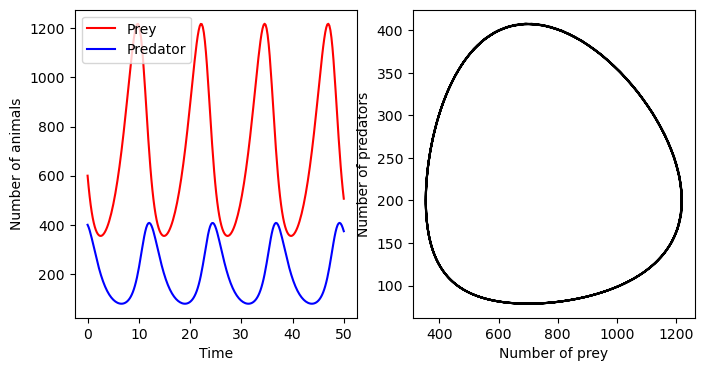

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,0], 'r', label="Prey")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")

前面的两个例子中，ODE 右侧的函数是在没有附加参数的情况下实现的。在 Lokta-Volterra 方程的例子中，函数 f 使用全局定义的系数变量。与使用全局变量相比，实现 f 函数通常更方便和优雅（因为，能够为所有系数提供参数）。为了说明这一点，我们考虑另一个着名的 ODE 问题：洛伦兹方程，它由三个耦合非线性常微分方程组组合而成：$x^{'}(t) = \sigma (y - x)$、$y^{'}(t) = x(\rho - z) - y$ 以及 $z^{'}(t) = xy - \beta z$。这些方程以其混沌解而著称，它敏感地依赖于参数$\sigma$、$\rho$ 和 $\beta$ 的值。如果我们希望针对这些参数的不同值求解这些方程式，那么编写 ODE 函数是非常有用的，以便它可以将这些变量的值作为参数。在下面 f 的实现中，相应命名的参数 sigma，rho 和 beta 已被添加：

In [27]:
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


接下来，我们定义具有特定的值的参数变量，t 值的数组，以及函数 x(t)、y(t) 和 z(t) 的初始条件。

In [28]:
sigma, rho, beta = 8, 28, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]

这一次，当我们调用 integrate.odeint 时，我们还需要指定 args 参数，它需是一个列表、元组或者数组，其元素数量与我们上面定义的 f 函数中的附加参数数量相同。这里，它有三个参数，当调用 integrate.odeint 时，我们通过 args 参数传递一个带有这些参数值的元组。

In [29]:
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

解存储在 NumPy 数组 xyz1、xyz2 和 xyz3 中。以下代码将三种解绘制在 3D 图形中，结果如下图所示。系统参数发生微小变化，所得到的解可能会有很大差异。

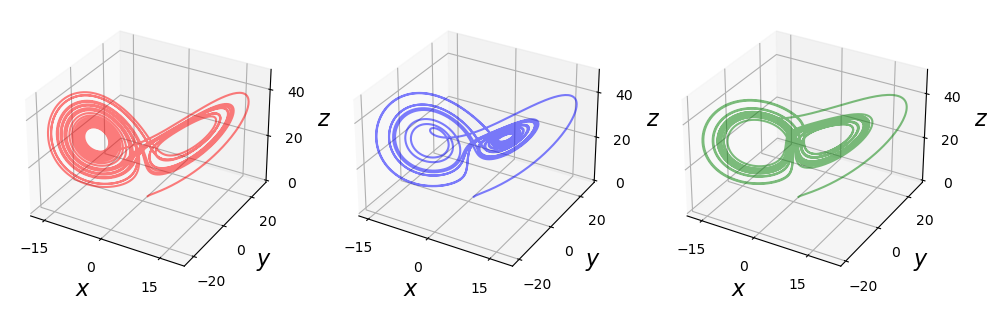

In [30]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4),subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

到目前为止，我们看到的三个例子都使用 odeint 求解器。该函数有大量用于微调求解器的可选参数，包括最大允许步数（hmax），Adams（mxordn）和BDF（mxords）方法的最大阶次选项等等。

在 SciPy 中另一种求解器是由 integration.ode 类提供的面向对象的接口。与 odeint 函数一样，要使用 integrate.ode 类，我们首先需要为 ODE 定义右侧函数，定义初始状态数组和独立变量值的数组。然而，一个小但重要的区别是，用于 odeint 的 f(x, y(x))的函数必须具有函数签名 f(y, x, …)，但 integrate.ode 必须具有函数签名 f(x, y, …)（也就是说， x 和 y 的顺序是相反的）。

integrate.ode类可以与不同求解器一起工作，并且对每个求解器都有特定的选项。为了说明如何使用 integrate.ode 接口，我们首先看看以下几组耦合二阶 ODE：

$$\begin{array}{l}
\mathrm{m}_{1} \mathrm{x}_{1}^{\prime \prime}(\mathrm{t})+\gamma_{1} \mathrm{x}_{1}^{\prime}(\mathrm{t})+\mathrm{k}_{1} \mathrm{x}_{1}-\mathrm{k}_{2}\left(\mathrm{x}_{2}-\mathrm{x}_{1}\right)=0 \\
\mathrm{~m}_{2} \mathrm{x}_{2}^{\prime \prime}(\mathrm{t})+\gamma_{2} \mathrm{x}_{2}^{\prime}(\mathrm{t})+\mathrm{k}_{2}\left(\mathrm{x}_{2}-\mathrm{x}_{1}\right)=0
\end{array}$$

这些方程描述了两个耦合弹簧的动力学，其中 $x_1(t)$ 和 $x_2(t)$ 是两个物体（质量为 $m_1$ 和 $m_2$）离开它们的平衡位置的位移。$x_1$ 处的物体经由具有弹簧常数 $k_1$ 的弹簧连接到固定壁，并且经由具有弹簧常数 $k_2$ 的弹簧连接到 $x_2$ 处的物体。这两个物体分别受到以 $\gamma_1$ 和 $\gamma_2$ 为特征的阻尼力。为了用 SciPy 解这类问题，我们首先必须将它们写成标准形式，我们可以通过引入 $y_0(t) = x_1(t)$、$y_1(t) = x_1^{'}(t)$、$y_2(t) = x_2(t)$ 和 $y_3(t) = x_2^{'}(t)$ 来实现，这得到了四个耦合的一阶方程：

$$\begin{array}{l} 
\frac{\mathrm{d}}{\mathrm{dt}}\left[\begin{array}{l}
\mathrm{y}_{0}(\mathrm{t}) \\
\mathrm{y}_{1}(\mathrm{t}) \\
\mathrm{y}_{2}(\mathrm{t}) \\
\mathrm{y}_{3}(\mathrm{t})
\end{array}\right]=\mathrm{f}(\mathrm{t}, \mathbf{y}(\mathrm{t})) \\
= {\left[\begin{array}{c}
\mathrm{y}_{1}(\mathrm{t}) \\
\left(-\gamma_{1} \mathrm{y}_{1}(\mathrm{t})-\mathrm{k}_{1} \mathrm{y}_{0}(\mathrm{t})-\mathrm{k}_{2} \mathrm{y}_{0}(\mathrm{t})+\mathrm{k}_{2} \mathrm{y}_{2}(\mathrm{t})\right) / \mathrm{m}_{1} \\
\mathrm{y}_{3}(\mathrm{t}) \\
\left(-\gamma_{2} \mathrm{y}_{3}(\mathrm{t})-\mathrm{k}_{2} \mathrm{y}_{2}(\mathrm{t})+\mathrm{k}_{2} \mathrm{y}_{0}(\mathrm{t})\right) / \mathrm{m}_{2}
\end{array}\right] }
\end{array}$$

第一项任务是编写实现函数 f(t, y(t)) 的 Python 函数，该函数将问题参数作为附加参数。在下面的实现中，我们将所有参数集中作为单个参数传递给函数的元组中，并在函数体第一行解包：

In [31]:
def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [y[1], - k1 / m1 * y[0] + k2 / m1 * (y[2] - y[0]) - g1 / m1 * y[1], y[3], - k2 / m2 *(y[2] - y[0])- g2 / m2 * y[3]]

In [32]:
m1, k1, g1 = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)


integrate.odeint 和 integrate.ode 之间的主要区别是从这一点开始。我们现在需要创建类 integrate.ode 的实例，将 ODE 函数 f 作为参数传递，而不是调用 odeint 函数：

In [33]:
r = integrate.ode(f)

这里，我们将产生的求解器实例存储在变量 r 中。在开始使用它之前，需要配置一些属性。至少需要使用 set_initial_value 方法设置初始状态，并且如果函数 f 需要额外参数，还需要使用 set_f_params 方法来配置这些参数。可以使用 set_integrator 方法来选择求解器，它接受以下求解器名称作为第一个参数：vode、zvode、lsoda、dopri5 和 dop853。每个求解器都有额外的可选参数。这里我们使用 LSODA 求解器，并设置初始状态和参数：

In [34]:
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);
r.set_f_params(args);

一旦求解器被创建和配置，我们可以通过调用 r.integrate 方法逐步求解 ODE，并且可以使用 r.successful 方法来查询积分的状态（只要积分进行得很好，就会返回 True ）。我们需要跟踪要积分到哪个点，并且我们需要自己存储结果：

In [35]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

这可以说并不像简单地调用 odeint 那么方便，但它提供了额外的灵活性，有时正是需要的。在这个例子中，我们将解存储在数组 y 中，每个对应的元素都在 t 中，这与 odeint 返回的内容类似。

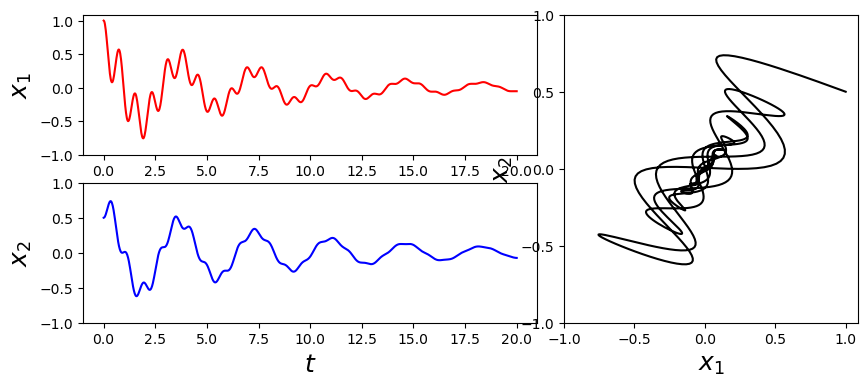

In [36]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
# x_1 vs time plot
ax1.plot(t, y[:, 0], 'r');
ax1.set_ylabel('$x_1$', fontsize=18);
ax1.set_yticks([-1, -.5, 0, .5, 1]);
# x2 vs time plot
ax2.plot(t, y[:, 2], 'b');
ax2.set_xlabel('$t$', fontsize=18);
ax2.set_ylabel('$x_2$', fontsize=18);
ax2.set_yticks([-1, -.5, 0, .5, 1]);
# x1 and x2 phase space plot
ax3.plot(y[:, 0], y[:, 2], 'k');
ax3.set_xlabel('$x_1$', fontsize=18);
ax3.set_ylabel('$x_2$', fontsize=18);
ax3.set_xticks([-1, -.5, 0, .5, 1]);
ax3.set_yticks([-1, -.5, 0, .5, 1]);

除了为ODE函数 f(t, y(t)) 提供 Python 函数外，还可以提供计算给定 t 和 y(t) 的雅可比矩阵的 Python 函数。例如，求解器可以使用雅可比行列式更有效地求解隐式方法中出现的方程组。为了使用雅可比函数 jac，我们需要将它与 f 函数一起创建，传递给 integrate.ode 类。如果雅可比函数 jac 需要附加参数，那么也必须在生成的 integrate.ode 实例中使用 set_jac_params 方法进行配置：

In [37]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [[0, 1, 0, 0],
            [- k1/m2 - k2/m1, - g1/m1 * y[1], k2/m1, 0],
            [0, 0, 1, 0],
            [k2/m2, 0, - k2/m2, - g2/m2]]


r = integrate.ode(f, jac)
r.set_jac_params(args);

对于 f(t, y(t)) 及其雅可比函数的 python 函数，只要 ODE 问题首先可以定义为一个 SymPy 表达式，就可以方便地使用 SymPy 的 lambdify 生成。这种符号数值混合方法是解 ODE 问题的有效方法。为了说明这种方法，考虑双摆中两个耦合的二阶非线性常微分方程的相当复杂的系统。第一个摆和第二个摆的角偏转运动方程 $\theta_1(t)$ 和 $\theta_2(t)$ 分别为（更多细节，参考这里）：

$$\begin{array}{l}
\left(m_{1}+m_{2}\right) l_{1} \theta_{1}^{\prime \prime}(t)+m_{2} l_{2} \theta_{2}^{\prime \prime}(t) \cos \left(\theta_{1}-\theta_{2}\right)+m_{2} l_{2}\left(\theta_{2}^{\prime}(t)\right)^{2} \sin \left(\theta_{1}-\theta_{2}\right) \\
+g\left(m_{1}+m_{2}\right) \sin \theta_{1}=0 \\
m_{2} l_{2} \theta_{2}^{\prime \prime}(t)+m_{2} l_{1} \theta_{1}^{\prime \prime} \cos \left(\theta_{1}-\theta_{2}\right)-m_{2} l_{1}\left(\theta_{1}^{\prime}(t)\right)^{2} \sin \left(\theta_{1}-\theta_{2}\right)+m_{2} g \sin \theta_{2}=0 .
\end{array}$$

第一摆与固定支架相连，第二摆与第一摆相连。这里 $m_1$ 和 $m_2$ 与 $l_1$ 和 $l_2$ 分别是第一摆与第二摆的质量与长度。我们首先为变量和问题中的函数定义 SymPy 符号，然后构造 ode 表达式：

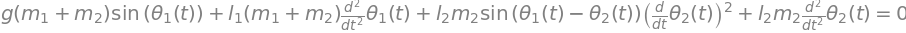

In [38]:
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)
ode1 = sympy.Eq((m1 + m2) * l1 * theta1(t).diff(t, t) +
                m2 * l2 * theta2(t).diff(t, t) +
                m2 * l2 * theta2(t).diff(t) ** 2 * sympy.sin(theta1(t) - theta2(t)) +
                g * (m1 + m2) * sympy.sin(theta1(t)), 0)
ode1

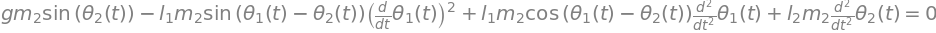

In [39]:
ode2 = sympy.Eq(m2 * l2 * theta2(t).diff(t, t) +
                m2 * l1 * theta1(t).diff(t, t) * sympy.cos(theta1(t) - theta2(t)) -
                m2 * l1 * theta1(t).diff(t) ** 2 * sympy.sin(theta1(t) - theta2(t)) +
                m2 * g * sympy.sin(theta2(t)), 0)
ode2                

现在 ode1 和 ode2 是两个二阶 ODE 方程的 SymPy 表达式。试图用 sympy.dsolve 求解这些方程式是徒劳的，我们需要使用数值方法。然而，这里的方程式形式并不适合用 SciPy 中提供的 ODE 求解器进行数值求解。首先必须将两个二阶 ODE 的系统写成标准形式的四个一阶 ODE。用标准形式重写方程并不困难，但手工操作可能很繁琐。幸运的是，我们可以利用 SymPy 的符号功能来自动执行此任务。为此，我们需要引入新的函数 $y_1(t) = \theta_1(t)$ 、$y_2(t) = \theta_1^{'}(t)$、$y_3(t) = \theta_2(t)$ 和 $y_4(t) = \theta_2^{'}(t)$，并根据这些函数重写 ODE。通过为变量变化创建一个字典，并使用 SymPy 函数 subs 来使用这个字典进行替换，我们可以很容易地得到 $y_2^{''}(t)$ 和 $y_4^{'}(t)$ 的方程：

In [40]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)
varchange = {theta1(t).diff(t, t): y2(t).diff(t),
             theta1(t): y1(t),
             theta2(t).diff(t, t): y4(t).diff(t),
             theta2(t): y3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)


我们还需要为 $y_1^{'}(t)$ 和 $y_3^{'}(t)$ 引入两个 ODE：

In [41]:
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)

现在，对于函数 $y_1$ 到 $y_4$ 我们有四个耦合的一阶 ODE。只有解这些函数的导数才能获得标准形式的 ODE。我们可以使用 sympy.solve 来做到：

In [42]:
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])


现在 f 是 ODE 函数 f(t, y(t)) 的 SymPy 表达式。可以使用 sympy.Eq(y.diff(t), f) 显示 ODE，但结果相当长，为了节省空间，在这里就不显示输出了。这里构造 f 的主要目的是将其转换为 NumPy-aware 函数，该函数可以与 integrate.odeint 或 integrate.ode 一起使用。现在可以使用 sympy.lambdify 创建这种函数。此外，由于我们对问题进行了符号表示，因此也很容易计算雅可比并为其创建一个支持 NumPy 的函数。当使用 sympy.lambdify 为 odeint 和 ode 创建函数时，我们必须小心地将 t 和 y 按正确的顺序放入传递给 sympy.lambdify 的元组中。这里我们使用 integrate.ode，所以我们需要一个带有签名 f(t, y, …) 的函数，因此我们将元组 (t, y) 作为第一个参数传递给 sympy.lambdify。

In [43]:
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}
f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])
jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')

With the functions f_np and jac_np, we are now ready to solve the ODE using integrate.ode in the same manner as in the previous examples. Here we take the initial state to be θ1(0) = 2 and θ2(0) = 0, and with the derivatives zero to zero, and we solve for the time interval [0, 20] with 1000 steps:

In [44]:
y0 = [2.0, 0, 0, 0]
t = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, t[0])
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1


ODE 的解现在存储在数组 y 中。当可视化该解时，绘制摆在 x-y 平面中的位置比绘制它们的角度偏转更直观。角变量 $\theta_1$ 和 $\theta_2$ 与 x 和 y 坐标之间的转换为：$x_1=l_1sin\theta_1$、$y_1=l_1cos\theta_1$、$x_2=x_1 + l_2sin\theta_2$ 和 $y_2 = y_1 + l_2cos\theta_2$：

In [45]:
theta1_np, theta2_np = y[:, 0], y[:, 2]
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

最后，我们绘制了双摆在 x - y 平面上随时间变化的动力学曲线。

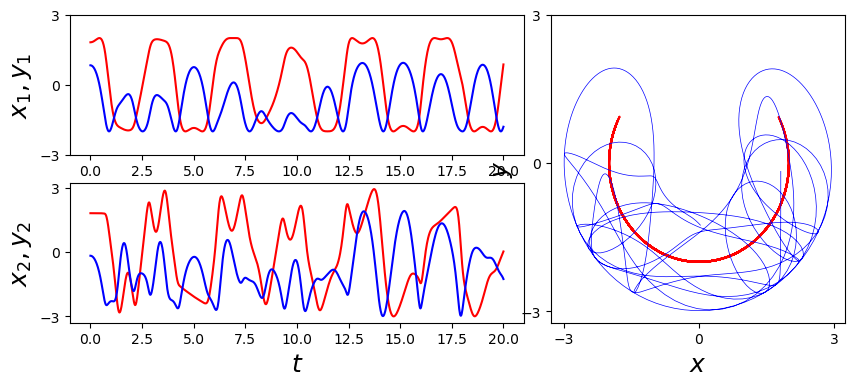

In [46]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, x1, 'r')
ax1.plot(t, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])

ax2.plot(t, x2, 'r')
ax2.plot(t, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])

ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])